In [95]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
import pickle

from MassMatrix.wrapper_module_0 import autofunc_c as MassMatrix
from CoriolisVector.wrapper_module_1 import autofunc_c as CoriolisVector
from Ls.wrapper_module_2 import autofunc_c as Ls
from Lm.wrapper_module_3 import autofunc_c as Lm
from Ls_derivative.wrapper_module_4 import autofunc_c as Ls_d
from Lm_derivative.wrapper_module_5 import autofunc_c as Lm_d

from pympc.geometry.polyhedron import Polyhedron
from pympc.dynamics.discrete_time_systems import LinearSystem
from pympc.control.controllers import ModelPredictiveController
from pympc.plot import plot_input_sequence, plot_state_trajectory, plot_state_space_trajectory


In [96]:
def mass_matrix(spacecraft_angles=None, joint_angles=None, Is=None, I_link=None, mass=None):
    if not Is:
        Is = np.array([1400, 1400, 2040])
    if not I_link:
        I_link = np.array([0.10, 0.25, 0.25, 0.10, 0.26, 0.26, 0.10, 0.26, 0.26])  # Ixx1, Ixx2, Ixx3, Iyy1, Iyy2, Iyy3, Izz1, Izz2, Izz3
    if not mass:
        mass = np.array([200.0, 20.0, 50.0, 50.0]) # m0=mass of satellite and the rest are link masses
    Is_xx, Is_yy, Is_zz = Is
    Ixx1, Ixx2, Ixx3, Iyy1, Iyy2, Iyy3, Izz1, Izz2, Izz3 = I_link
    alpha, beta, gamma = spacecraft_angles
    m0, m1, m2, m3 = mass
    theta_1, theta_2, theta_3 = joint_angles
    return MassMatrix(Is_xx, Is_yy, Is_zz, Ixx1, Ixx2, Ixx3, Iyy1, Iyy2, Iyy3, Izz1, Izz2, Izz3, alpha, beta, gamma, m0, m1, m2, m3, theta_1, theta_2, theta_3)

In [97]:
def coriolis_vector(spacecraft_angles=None, joint_angles=None, spacecraft_vel=None, joint_vel=None, Is=None, I_link=None, mass=None):
    if not Is:
        Is = np.array([1400, 1400, 2040])
    if not I_link:
        I_link = np.array([0.10, 0.25, 0.25, 0.10, 0.26, 0.26, 0.10, 0.26, 0.26])  # Ixx1, Ixx2, Ixx3, Iyy1, Iyy2, Iyy3, Izz1, Izz2, Izz3
    if not mass:
        mass = np.array([200.0, 20.0, 50.0, 50.0]) # m0=mass of satellite and the rest are link masses
    Is_xx, Is_yy, Is_zz = Is
    Ixx1, Ixx2, Ixx3, Iyy1, Iyy2, Iyy3, Izz1, Izz2, Izz3 = I_link
    alpha, beta, gamma = spacecraft_angles
    m0, m1, m2, m3 = mass
    theta_1, theta_2, theta_3 = joint_angles
    alpha_d, beta_d, gamma_d = spacecraft_vel
    theta_1d, theta_2d, theta_3d = joint_vel
    return CoriolisVector(Is_xx, Is_yy, Is_zz, Ixx1, Ixx2, Ixx3, Iyy1, Iyy2, Iyy3, Izz1, Izz2, Izz3, alpha, alpha_d, beta, beta_d, gamma, gamma_d, m0, m1, m2, m3, theta_1, theta_1d, theta_2, theta_2d, theta_3, theta_3d)

In [98]:
def calculate_Ls(spacecraft_angles=None, joint_angles=None, Is=None, I_link=None, mass=None):
    if not Is:
        Is = np.array([1400, 1400, 2040])
    if not I_link:
        I_link = np.array([0.10, 0.25, 0.25, 0.10, 0.26, 0.26, 0.10, 0.26, 0.26])  # Ixx1, Ixx2, Ixx3, Iyy1, Iyy2, Iyy3, Izz1, Izz2, Izz3
    if not mass:
        mass = np.array([200.0, 20.0, 50.0, 50.0]) # m0=mass of satellite and the rest are link masses
    Is_xx, Is_yy, Is_zz = Is
    Ixx1, Ixx2, Ixx3, Iyy1, Iyy2, Iyy3, Izz1, Izz2, Izz3 = I_link
    alpha, beta, gamma = spacecraft_angles
    m0, m1, m2, m3 = mass
    theta_1, theta_2, theta_3 = joint_angles
    return Ls(Is_xx, Is_yy, Is_zz, Ixx1, Ixx2, Ixx3, Iyy1, Iyy2, Iyy3, Izz1, Izz2, Izz3, alpha, beta, gamma, m0, m1, m2, m3, theta_1, theta_2, theta_3)

In [99]:
def calculate_Lm(spacecraft_angles=None, joint_angles=None, Is=None, I_link=None, mass=None):
    if not Is:
        Is = np.array([1400, 1400, 2040])
    if not I_link:
        I_link = np.array([0.10, 0.25, 0.25, 0.10, 0.26, 0.26, 0.10, 0.26, 0.26])  # Ixx1, Ixx2, Ixx3, Iyy1, Iyy2, Iyy3, Izz1, Izz2, Izz3
    if not mass:
        mass = np.array([200.0, 20.0, 50.0, 50.0]) # m0=mass of satellite and the rest are link masses
    Is_xx, Is_yy, Is_zz = Is
    Ixx1, Ixx2, Ixx3, Iyy1, Iyy2, Iyy3, Izz1, Izz2, Izz3 = I_link
    alpha, beta, gamma = spacecraft_angles
    m0, m1, m2, m3 = mass
    theta_1, theta_2, theta_3 = joint_angles
    return Lm(Ixx1, Ixx2, Ixx3, Iyy1, Iyy2, Iyy3, Izz1, Izz2, Izz3, alpha, beta, gamma, m0, m1, m2, m3, theta_1, theta_2, theta_3)

In [100]:
def Ls_derivative(spacecraft_angles=None, joint_angles=None, spacecraft_vel=None, joint_vel=None, Is=None, I_link=None, mass=None):
    if not Is:
        Is = np.array([1400, 1400, 2040])
    if not I_link:
        I_link = np.array([0.10, 0.25, 0.25, 0.10, 0.26, 0.26, 0.10, 0.26, 0.26])  # Ixx1, Ixx2, Ixx3, Iyy1, Iyy2, Iyy3, Izz1, Izz2, Izz3
    if not mass:
        mass = np.array([200.0, 20.0, 50.0, 50.0]) # m0=mass of satellite and the rest are link masses
    Is_xx, Is_yy, Is_zz = Is
    Ixx1, Ixx2, Ixx3, Iyy1, Iyy2, Iyy3, Izz1, Izz2, Izz3 = I_link
    alpha, beta, gamma = spacecraft_angles
    m0, m1, m2, m3 = mass
    theta_1, theta_2, theta_3 = joint_angles
    alpha_d, beta_d, gamma_d = spacecraft_vel
    theta_1d, theta_2d, theta_3d = joint_vel
    return Ls_d(Is_xx, Is_yy, Is_zz, Ixx1, Ixx2, Ixx3, Iyy1, Iyy2, Iyy3, Izz1, Izz2, Izz3, alpha, alpha_d, beta, beta_d, gamma, gamma_d, m0, m1, m2, m3, theta_1, theta_1d, theta_2, theta_2d, theta_3, theta_3d)

In [101]:
def Lm_derivative(spacecraft_angles=None, joint_angles=None, spacecraft_vel=None, joint_vel=None, Is=None, I_link=None, mass=None):
#     if not Is:
#         Is = np.array([1400, 1400, 2040])
    if not I_link:
        I_link = np.array([0.10, 0.25, 0.25, 0.10, 0.26, 0.26, 0.10, 0.26, 0.26])  # Ixx1, Ixx2, Ixx3, Iyy1, Iyy2, Iyy3, Izz1, Izz2, Izz3
    if not mass:
        mass = np.array([200.0, 20.0, 50.0, 50.0]) # m0=mass of satellite and the rest are link masses
#     Is_xx, Is_yy, Is_zz = Is
    Ixx1, Ixx2, Ixx3, Iyy1, Iyy2, Iyy3, Izz1, Izz2, Izz3 = I_link
    alpha, beta, gamma = spacecraft_angles
    m0, m1, m2, m3 = mass
    theta_1, theta_2, theta_3 = joint_angles
    alpha_d, beta_d, gamma_d = spacecraft_vel
    theta_1d, theta_2d, theta_3d = joint_vel
    return Lm_d(Ixx1, Ixx2, Ixx3, Iyy1, Iyy2, Iyy3, Izz1, Izz2, Izz3, alpha, alpha_d, beta, beta_d, gamma, gamma_d, m0, m1, m2, m3, theta_1, theta_1d, theta_2, theta_2d, theta_3, theta_3d)

In [102]:
# Test Values and functions
phi_s = np.array([0.1, 0.2, 0.3])  # alpha, beta, gamma
q = np.array([0.01, 0.2, 0.15])  # theta_1, theta_2, theta_3
phi_s_dot = np.array([.1, .2, .3])
q_dot = np.array([.3, .4, .5])

# mass_matrix(phi_s, q)
# coriolis_vector(phi_s, q, phi_s_dot, q_dot)
# calculate_Ls(phi_s, q)
# calculate_Lm(phi_s, q)
# Ls_derivative(phi_s, q, phi_s_dot, q_dot)
# Lm_derivative(phi_s, q, phi_s_dot, q_dot)

In [103]:
n_states, n_inputs = 6, 3
identity = np.eye(int(n_states/2))
zeros = np.zeros((int(n_states/2), int(n_states/2)))
# Continuous time dynamics: 
A = np.vstack((np.hstack((zeros, identity)), np.hstack((zeros, zeros))))
B = np.vstack((zeros, identity))
h = .1
method = 'zero_order_hold'
S = LinearSystem.from_continuous(A, B, h, method)
N = 10  # prediction horizon
Q = 0.5 * np.eye(n_states)
R = 0.2 * np.eye(n_inputs)

In [104]:
P, K = S.solve_dare(Q, R)

In [105]:
u_min = -100 * np.ones(n_inputs)
u_max = 100 * np.ones(n_inputs)
U = Polyhedron.from_bounds(u_min, u_max)
x_min = -100 * np.ones(n_states)
x_max = 100 * np.ones(n_states)
X = Polyhedron.from_bounds(x_min, x_max)
D = X.cartesian_product(U)

In [106]:
X_N = S.mcais(K, D)

In [107]:
controller = ModelPredictiveController(S, N, Q, R, P, D, X_N)

In [108]:
# Nsim = 50
# x0 = np.array([.39, .39, .39, .39, .39, .39])
# u = []
# x = [x0]
# for t in range(Nsim):
#     u.append(controller.feedback(x[t]))
#     x.append(S.A.dot(x[t]) + S.B.dot(u[t]))

In [109]:
# plot_input_sequence(u, h, (u_min, u_max))
# plt.show()
# plot_state_trajectory(x, h, (x_min, x_max))
# plt.show()

In [110]:
with open('end_eff_cart_coord.pickle', 'rb') as eef:
    eef_pos = pickle.loads(eef.read())

In [111]:
tt = 0.5
eef_vel = np.vstack((tt*np.ones(eef_pos.shape[1]), tt*np.ones(eef_pos.shape[1]), np.zeros(eef_pos.shape[1])))
x_ref = np.vstack((eef_pos, eef_vel))
eef_vel[:, 0:10]

array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]])

In [112]:
Nsim = x_ref.shape[1]
x0 = np.array([3.39, 3.39, 3.39, 3.39, 3.39, 3.39])
u, x = [], [x0]
for t in range(Nsim):
    xx = x[t] - x_ref[:, t]
    u.append(controller.feedback(xx))
    x.append(S.A.dot(x[t]) + S.B.dot(u[t]))

In [113]:
# plot_input_sequence(u, h, (u_min, u_max))
# plt.show()
# plot_state_trajectory(x, h, (x_min, x_max))
# plt.show()
len(x), len(u), x[0].shape
x_ref[:, 3:8]

array([[3.78177243, 3.81592475, 3.85406705, 3.89508893, 3.9390328 ],
       [3.7286487 , 3.69312889, 3.65209626, 3.60614168, 3.554428  ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

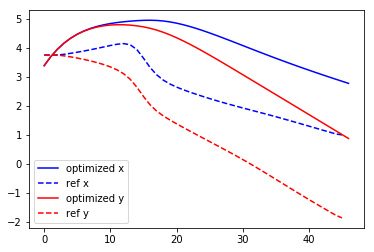

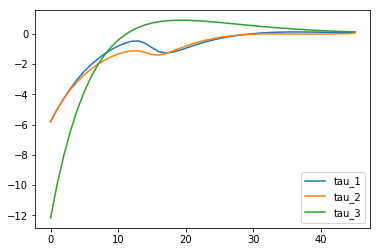

In [94]:
xx, yy, = np.zeros(len(x)), np.zeros(len(x))
for i in range(len(x)):
    xx[i], yy[i] = x[i][0], x[i][1]
plt.figure()
plt.plot(xx, 'b', label='optimized x')
plt.plot(x_ref[0, :], 'b--', label='ref x')
plt.plot(yy, 'r', label='optimized y')
plt.plot(x_ref[1, :], 'r--', label='ref y')
plt.legend()
plt.show()

u1, u2, u3 = np.zeros(len(u)), np.zeros(len(u)), np.zeros(len(u))
for i in range(len(u)):
    u1[i], u2[i], u3[i] = u[i][0], u[i][1], u[i][2]
plt.plot(u1, label='tau_1')
plt.plot(u2, label='tau_2')
plt.plot(u3, label='tau_3')
plt.legend()
plt.show()

In [21]:
from mpc_optimizer import mpc_opt
mpc = mpc_opt(Q=Q, P=P, R=R, A=A, B=B, C=np.eye(6), time=np.linspace(0, 10, Nsim), ul=u_min.reshape((len(u_min), 1)),
                       uh=u_max.reshape((len(u_max), 1)), xl=x_min.reshape((len(x_min), 1)),
              xh=x_max.reshape((len(x_max), 1)), N=N, ref_traj=x_ref)

In [22]:
x0 = x0.reshape((len(x0), 1))
u0 = np.array([[0.2], [0.3], [0.5]])

X, U = mpc.get_state_and_input(u0, x0)

i = : 0
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -23948.599250255196
            Iterations: 13
            Function evaluations: 36
            Gradient evaluations: 13
i = : 1
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -23948.599250269348
            Iterations: 1
            Function evaluations: 6
            Gradient evaluations: 1
i = : 2
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -23948.59925027031
            Iterations: 1
            Function evaluations: 5
            Gradient evaluations: 1
i = : 3
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -23947.800178182722
            Iterations: 4
            Function evaluations: 14
            Gradient evaluations: 4
i = : 4
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -23944.247166173634
          

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -2526.897879836095
            Iterations: 7
            Function evaluations: 23
            Gradient evaluations: 7
i = : 39
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -2569.7263131168356
            Iterations: 7
            Function evaluations: 23
            Gradient evaluations: 7
i = : 40
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -2646.503353395643
            Iterations: 7
            Function evaluations: 23
            Gradient evaluations: 7
i = : 41
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -2756.25239696448
            Iterations: 7
            Function evaluations: 23
            Gradient evaluations: 7
i = : 42
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -2900.2911814796053
            Itera

In [23]:
X[:, 2]

array([1.64860595, 1.64860529, 0.08387019, 1.64844024, 1.64843965,
       0.08370444])